In [1]:
data_dir = '../Data/'

train_dir = data_dir + 'train/'
val_dir = data_dir + 'valid/'
test_dir = data_dir + 'test/'

annotations_suffix = '_annotations.coco.json'

train_annotation_file = train_dir + annotations_suffix
val_annotation_file = val_dir + annotations_suffix
test_annotation_file = test_dir + annotations_suffix

In [2]:
from pycocotools.coco import COCO

In [3]:
train_coco = COCO(train_annotation_file)
val_coco = COCO(val_annotation_file)
test_coco = COCO(test_annotation_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
cats = train_coco.loadCats(train_coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Tumor 0 1

COCO supercategories: 
Tumor none


In [5]:
for key in train_coco.imgs.keys():
    print(train_coco.imgs[key])
    break

{'id': 0, 'license': 1, 'file_name': '2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}


In [6]:
train_coco.getCatIds()

[0, 1, 2]

In [7]:
train_coco.getCatIds(catNms=['1'])

[2]

In [8]:
train_coco.getImgIds(catIds=[2])[:5]

[7, 8, 11, 16, 17]

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import numpy as np
import os

{'id': 7, 'image_id': 7, 'category_id': 2, 'bbox': [350, 288, 42.5, 52.5], 'area': 2231.25, 'segmentation': [[392.5, 287.5, 350, 287.5, 350, 340, 392.5, 340, 392.5, 287.5]], 'iscrowd': 0}


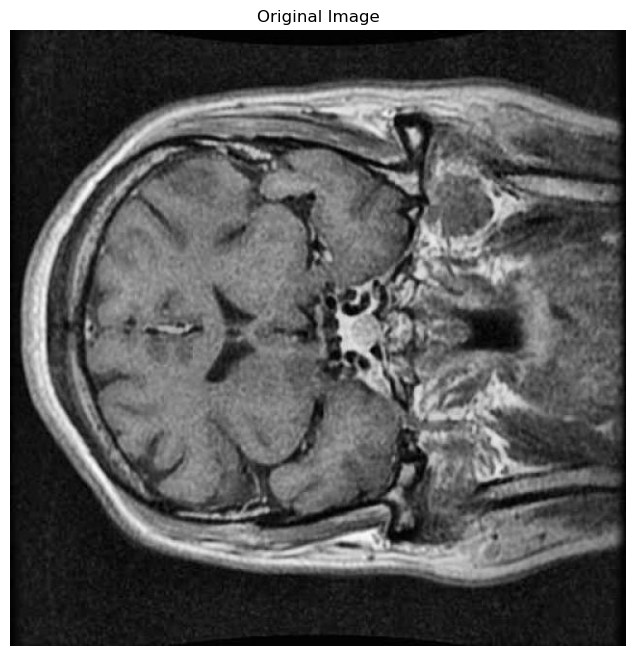

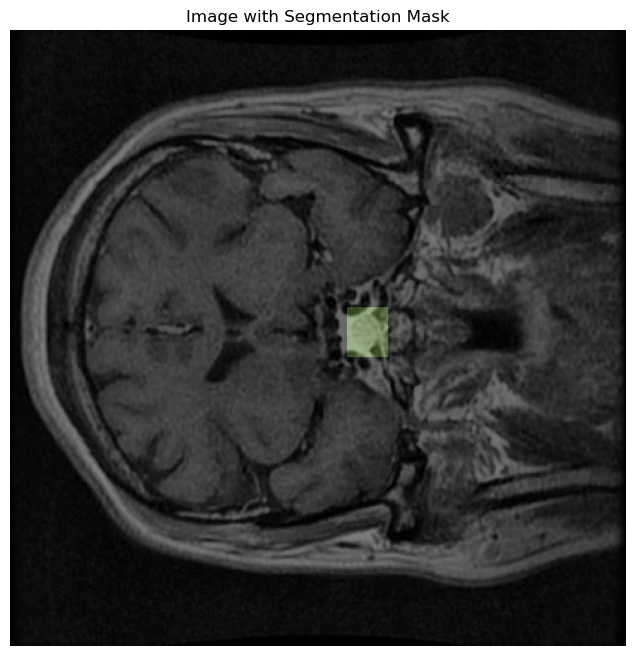

In [14]:
annotation_path = train_annotation_file
image_folder = train_dir

coco = train_coco

# Get sample image containing a tumor
tumor_ann = train_coco.getAnnIds(catIds=[2])[0]  # category_id for "tumor" is 2
tumor_ann = train_coco.loadAnns(tumor_ann)[0]

print(tumor_ann)

# Load image
image_id = tumor_ann['image_id']
image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(image_folder, image_info['file_name'])
image = Image.open(image_path).convert("RGB")

# Display original
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Load annotations sample image
ann_ids = coco.getAnnIds(imgIds=image_info['id'])
annotations = coco.loadAnns(ann_ids)

# Create mask overlay
mask_overlay = Image.new('RGB', image.size)
for ann in annotations:
    mask = coco.annToMask(ann)
    color = tuple(np.random.randint(0, 255, size=3).tolist())
    pil_mask = Image.fromarray((mask * 255).astype(np.uint8))
    colored_mask = Image.new('RGB', image.size, color)
    mask_overlay = Image.composite(colored_mask, mask_overlay, pil_mask)

# Combine original image with mask
combined = Image.blend(image, mask_overlay, alpha=0.5)

# Display combined
plt.figure(figsize=(8, 8))
plt.imshow(combined)
plt.title("Image with Segmentation Mask")
plt.axis("off")
plt.show()